In [196]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [211]:
samp_rate = 2e6         #hz
pulse_duration = 0.0005  #seconds
starting_freq = 100e3     #hz
ending_freq = 150e3     #hz

freqs = np.linspace(starting_freq,ending_freq,int(pulse_duration*samp_rate))
t_pulse = np.linspace(0,pulse_duration,int(pulse_duration*samp_rate))

In [212]:
pulse = np.zeros(len(freqs))
for i in range(0,len(freqs)):
    pulse[i] = np.sin(2*np.pi*freqs[i]*t_pulse[i])

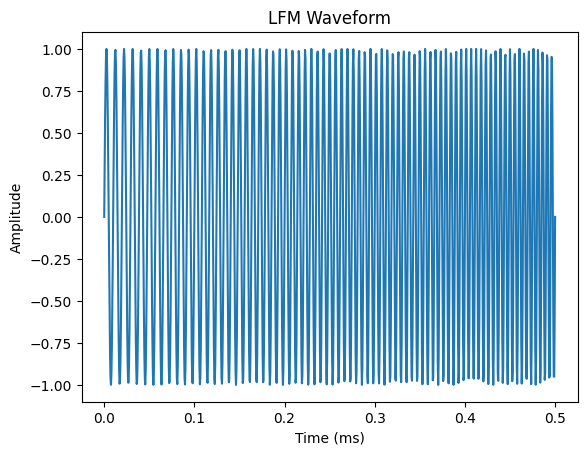

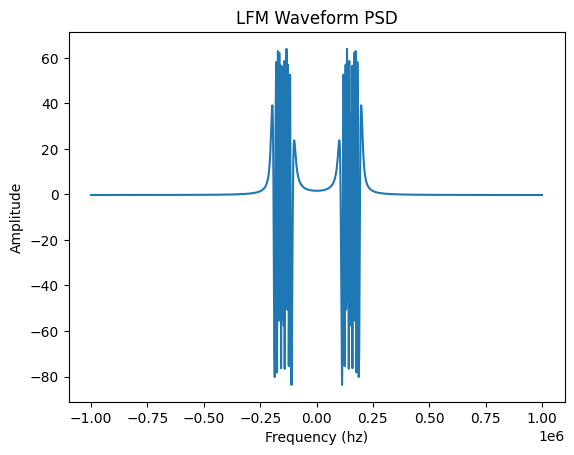

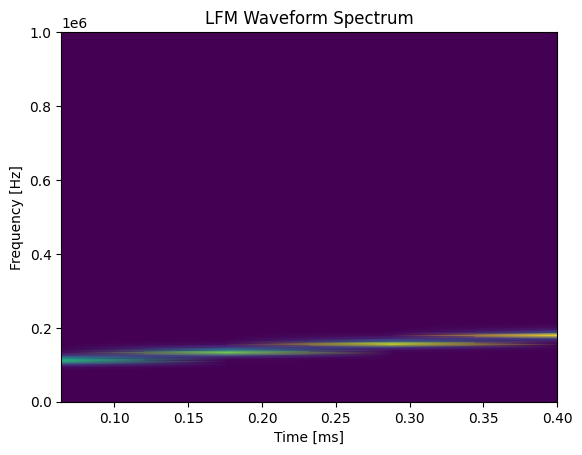

In [213]:
plt.title("LFM Waveform")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.plot(t_pulse*1000, pulse);
plt.show();

plt.title("LFM Waveform PSD")
plt.xlabel("Frequency (hz)")
plt.ylabel("Amplitude")
plt.plot(np.linspace(samp_rate/-2,samp_rate/2, len(pulse)), np.fft.fftshift(np.fft.fft(pulse)));
plt.show();

f, t, Sxx = signal.spectrogram(pulse, samp_rate)
plt.pcolormesh(t*1000, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [ms]')
plt.title("LFM Waveform Spectrum")
plt.show()

In [214]:
#pulse_train = np.concatenate([np.zeros(int(samp_rate*0.5)), pulse, np.zeros(int(samp_rate*2))])
pulse_train = np.concatenate([pulse, np.zeros(int(samp_rate*2))])
t_pulse_train = np.linspace(0,len(pulse_train)*(1/samp_rate), len(pulse_train))

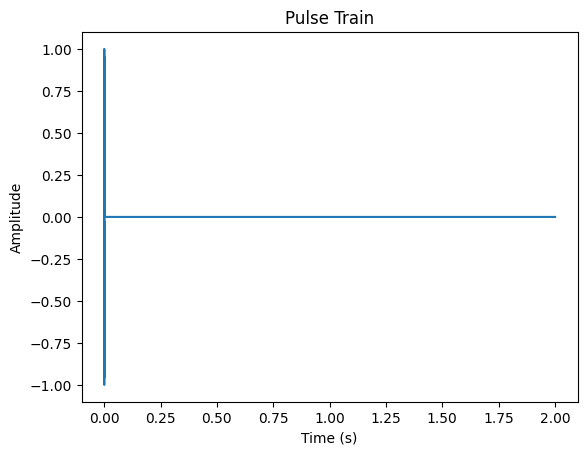

In [215]:
plt.title("Pulse Train")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_pulse_train, pulse_train);

In [216]:
# reflected_pulse = pulse * 0.25 #+ (np.random.rand(len(pulse)) - .5) * .4
# ret_pulse_train = pulse_train #+ (np.random.rand(len(pulse_train)) - 0.5) * 0.4
# ret_pulse_train[2000000:2004000] = reflected_pulse;

In [217]:
reflected_pulse = pulse * 0.25 #+ (np.random.rand(len(pulse)) - .5) * .4
ret_pulse_train = pulse_train #+ (np.random.rand(len(pulse_train)) - 0.5) * 0.4
ret_pulse_train[2000000:2000000+len(pulse)] = reflected_pulse;

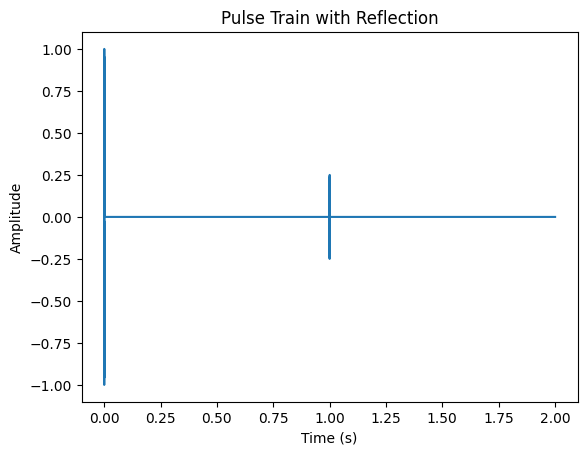

In [218]:
plt.title("Pulse Train with Reflection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_pulse_train, ret_pulse_train);

In [219]:
pulse_compression = np.convolve(np.flip(pulse), ret_pulse_train)
t_pulse_compression = np.linspace(0,len(pulse_compression)*(1/samp_rate), len(pulse_compression))

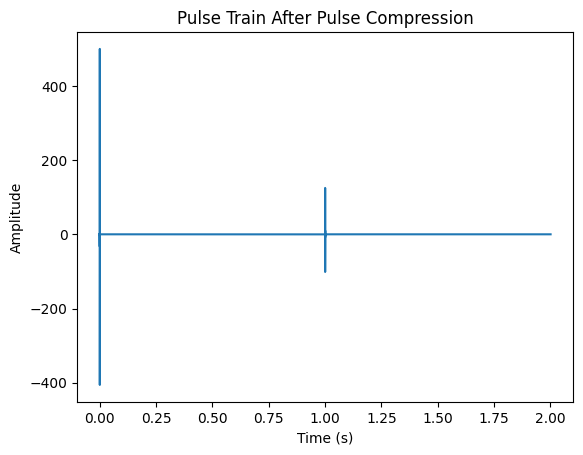

In [220]:
plt.title("Pulse Train After Pulse Compression")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_pulse_compression, pulse_compression);

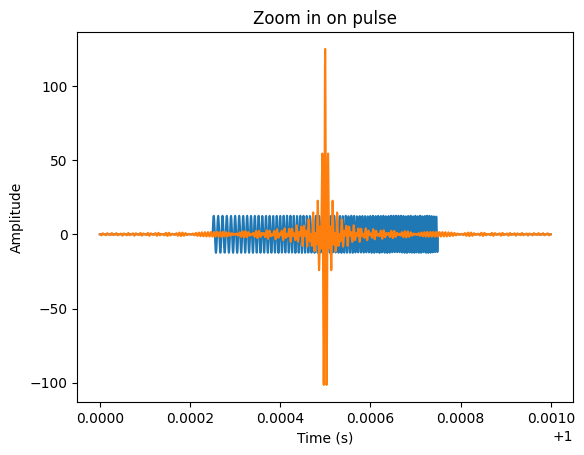

In [221]:
plt.title("Zoom in on pulse")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_pulse_compression[2000000:2002000], ret_pulse_train[1999500:2001500]*50);
plt.plot(t_pulse_compression[2000000:2002000], pulse_compression[2000000:2002000]);


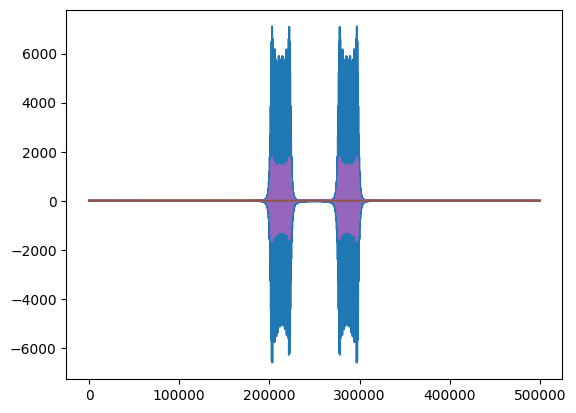

In [222]:
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[0:500000]))); #plt.show()
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[500000:1000000])));# plt.show()
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[1000000:1500000])));# plt.show()
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[1500000:2000000]))); #plt.show()
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[2000000:2500000])));# plt.show()
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[2500000:3000000]))); plt.show()

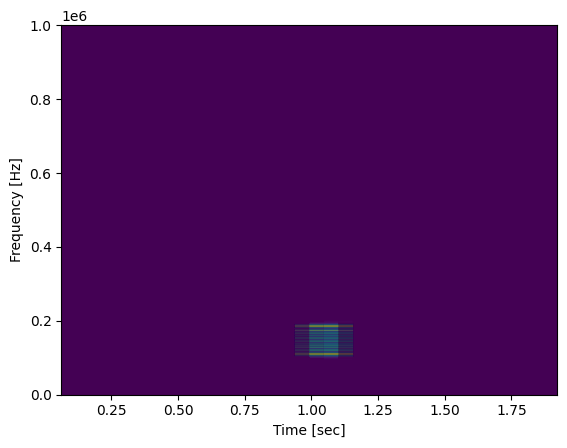

In [223]:


f, t, Sxx = signal.spectrogram(pulse_compression, samp_rate, nperseg=250000)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()
